In [337]:
# based on the following tutorial
# https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_linear_regression/

In [338]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

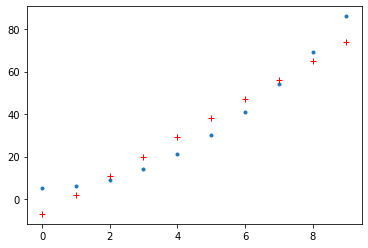

In [339]:
np.random.seed(1)
n = 10
#x = np.random.randn(n)
x = np.arange(0, n)
#x = [0 : 10]

y = x * x + 5 #* np.random.randn(n)
# plot points
plt.plot(x, y, '.')
# plot line fit
y_polyfit = np.polyfit(x,y,1)
y_fit = y_polyfit[0]*x+y_polyfit[1]
plt.plot(x,y_fit, 'r+')
plt.show()

In [340]:
# convert list to numpy array
x_train = np.array(x, dtype=np.float32)
x_train.shape

(10,)

In [341]:
# convert to 2D array
x_train = x_train.reshape(-1, 1)
x_train.shape

(10, 1)

In [342]:
# do the same for y_train
y_train = np.array(y, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(10, 1)

In [343]:
# import torch
import torch
import torch.nn as nn

In [467]:
# now, build the model
# Create class
class LinearRegressionModel1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel1, self).__init__()
        self.linear1 = nn.Linear(input_dim, output_dim, bias=True)
        #self.linear2 = nn.Linear(2, output_dim, bias=True)

    def forward(self, x):
        #out = nn.functional.normalize(x, p=2)
        out = self.linear1(x)
        #out = self.linear2(out)
        #out = nn.functional.relu(out)
        return out

In [455]:
# now, build the model
# Create class
class LinearRegressionModel2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel2, self).__init__()
        self.linear1 = nn.Linear(input_dim, 50)
        self.linear2 = nn.Tanh()
        self.linear3 = nn.Linear(50, 50)
        self.linear4 = nn.Tanh()
        self.linear5 = nn.Linear(50, output_dim)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.linear4(x)
        x = self.linear5(x)
        
        return x

In [468]:
model = LinearRegressionModel1(input_dim=1, output_dim=1)
#model = LinearRegressionModel2(input_dim=1, output_dim=1)
#model = nn.Linear(in_features=1, out_features=1, bias=True)
#model = nn.Linear(1, 1, bias=True)

In [469]:
# loss
criterion = nn.MSELoss()
# optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch 1, loss 1465.0543212890625
epoch 2, loss 1307.31591796875
epoch 3, loss 1167.470947265625
epoch 4, loss 1043.489501953125
epoch 5, loss 933.5716552734375
epoch 6, loss 836.1218872070312
epoch 7, loss 749.7254028320312
epoch 8, loss 673.12841796875
epoch 9, loss 605.218994140625
epoch 10, loss 545.0115966796875
epoch 11, loss 491.63232421875
epoch 12, loss 444.3062438964844
epoch 13, loss 402.346923828125
epoch 14, loss 365.1454162597656
epoch 15, loss 332.1617431640625
epoch 16, loss 302.9176330566406
epoch 17, loss 276.98858642578125
epoch 18, loss 253.9986572265625
epoch 19, loss 233.61422729492188
epoch 20, loss 215.539794921875
epoch 21, loss 199.51321411132812
epoch 22, loss 185.30223083496094
epoch 23, loss 172.7008819580078
epoch 24, loss 161.52633666992188
epoch 25, loss 151.61695861816406
epoch 26, loss 142.82913208007812
epoch 27, loss 135.0355682373047
epoch 28, loss 128.12350463867188
epoch 29, loss 121.99290466308594
epoch 30, loss 116.55516052246094
epoch 31, loss 1

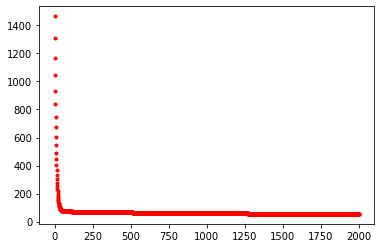

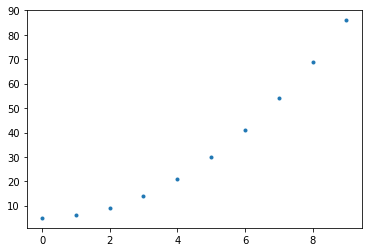

In [470]:
# train the model
epochs = 2000
for epoch in range(epochs):
    epoch += 1

    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    optimizer.zero_grad()
    #optimizer2.zero_grad()

    outputs = model(inputs)
    #outputs2 = model2(inputs)

    loss = criterion(outputs, labels)
    #loss2 = criterion(outputs2, labels)

    loss.backward()
    #loss2.backward()

    optimizer.step()
    #optimizer2.step()

    #print(f'epoch {epoch}, loss1 {loss1.item()}, loss2 {loss2.item()}')
    print(f'epoch {epoch}, loss {loss.item()}')
    plt.plot(epoch, loss.item(), 'r.')
    

# print the shit
plt.show()
plt.plot(x_train, y_train, '.')
plt.show()

In [471]:
# prediction
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
#predicted2 = model2(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[-4.1727986],
       [ 4.3763337],
       [12.925467 ],
       [21.474598 ],
       [30.023731 ],
       [38.572865 ],
       [47.121994 ],
       [55.671127 ],
       [64.22026  ],
       [72.769394 ]], dtype=float32)

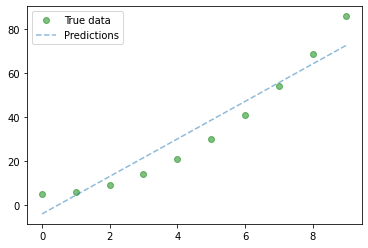

In [472]:
# Clear figure
plt.clf()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()